<a href="https://colab.research.google.com/github/gsingla21/Machine_Learning/blob/main/Support%20Vector%20Machines/ML_Assignment_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GOURISH SINGLA**

**101803698**

**CoE-15**

#Load dataset

In [ ]:
import pandas as pd
url='/content/drive/MyDrive/ML assignments/SVM/Dataset/breast_cancer.csv'
dataset=pd.read_csv(url)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Map the output values 
to 1 for positive class and -1 for negative class.

In [ ]:
import pandas as pd
import numpy as np

diagnosis_map = {'M':1, 'B':-1}
dataset['diagnosis'] = dataset['diagnosis'].map(diagnosis_map)

In [ ]:
dataset['diagnosis'].unique()

array([ 1, -1])

#Divide the dataset into input and output features.
#Scale the input features
#Add a column of one’s in input features.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts

Y = dataset.loc[:, 'diagnosis'] # all rows of 'diagnosis'
X = dataset.iloc[:, 1:]
X_normalized = StandardScaler().fit_transform(X.values)
X = pd.DataFrame(X_normalized)
X.insert(loc=len(X.columns), column='intercept', value=1)
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.2, random_state=42)

#Compute cost gradient

In [ ]:
def calculate_cost_gradient(W, x, y):
  distance = 1 - (y * x.dot(W))
  gradient = np.zeros(len(W))
  if max(0, distance) == 0:
    di = W
  else:
    di = W - (C * y * x)
  gradient += di
  return gradient

#Stochastic Gradient Algorithm

In [ ]:
from sklearn.utils import shuffle
def sgd(features, outputs):
  max_epochs = 1000
  weights = np.zeros(features.shape[1])
  # stochastic gradient descent
  for epoch in range(1, max_epochs):
    # shuffle to prevent repeating update cycles
    X, Y = shuffle(features, outputs)
    for ind, x in enumerate(X):
      gradient = calculate_cost_gradient(weights, x, Y[ind])
      weights = weights - (learning_rate * gradient)
  return weights

#Execution

In [ ]:
C = 10000 # regularization strength
learning_rate = 0.00001

W = sgd(X_train.to_numpy(),
y_train.to_numpy())

#Prediction

In [ ]:
y_predicted = np.array([])

for i in range(X_test.shape[0]):
  yp = np.sign(np.dot(W, X_test.to_numpy()[i])) #model
  y_predicted = np.append(y_predicted, yp)

#Performance Evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("accuracy on test dataset: {}".format(accuracy_score(y_test.to_numpy(), y_predicted)))
print((metrics.classification_report(y_test.to_numpy(), y_predicted)))

accuracy on test dataset: 0.9736842105263158
              precision    recall  f1-score   support

          -1       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#Tuning learning rate and C

In [ ]:
def compute_cost(W, X, Y):
  # calculate hinge loss
  reg_strength = 0.01
  N = X.shape[0]
  distances = 1 - Y * (np.dot(X, W))
  distances[distances < 0] = 0 # equivalent to max(0, distance)
  hinge_loss = reg_strength * (np.sum(distances) / N)
  # calculate cost
  cost = 1 / 2 * np.dot(W, W) + hinge_loss
  return cost

In [ ]:
learning_rate=[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2]

def sgd(features, outputs):
  max_epochs = 1000
  weights = np.random.random(features.shape[1])
  cost=[]
  # stochastic gradient descent
  for i in range(len(learning_rate)):
    for epoch in range(1, max_epochs):
      # shuffle to prevent repeating update cycles
      X, Y = shuffle(features, outputs)
      for ind, x in enumerate(X):
        gradient= calculate_cost_gradient(weights, x, Y[ind])
        weights = weights - (learning_rate[i] * gradient)
    cost.append(compute_cost(weights,features,outputs))
  return cost

In [ ]:
cost = sgd(X_train.to_numpy(),y_train.to_numpy())

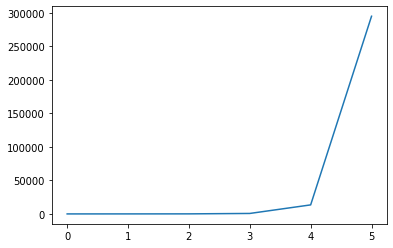

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cost)